# Sea Animals Projects

<img src='dataset-cover.jpg'>

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_dir = 'C:\\Users\\PC11\\Desktop\\AI\\projects\\Kaggle_Projects\\Sea _Animals_Image\\data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 13711 files belonging to 23 classes.


In [6]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [7]:
batch = data_iterator.next() 
batch

(array([[[[110.25781  , 154.25781  , 219.25781  ],
          [113.       , 156.22656  , 220.96875  ],
          [110.85156  , 151.85156  , 215.85156  ],
          ...,
          [ 10.7109375,  22.710938 ,  46.710938 ],
          [ 12.7421875,  26.96875  ,  50.226562 ],
          [ 14.828125 ,  29.828125 ,  52.828125 ]],
 
         [[113.368164 , 154.93066  , 220.60352  ],
          [114.625    , 155.62354  , 219.97217  ],
          [112.82568  , 152.20068  , 217.01318  ],
          ...,
          [ 11.40918  ,  23.40918  ,  47.40918  ],
          [ 12.13916  ,  26.365723 ,  49.623535 ],
          [ 13.272949 ,  28.27295  ,  51.27295  ]],
 
         [[120.09619  , 156.97119  , 222.91748  ],
          [118.416016 , 155.12988  , 220.58545  ],
          [115.24707  , 151.49707  , 216.59375  ],
          ...,
          [ 11.865723 ,  25.928223 ,  49.240723 ],
          [ 11.489746 ,  25.737793 ,  50.34912  ],
          [ 11.598145 ,  25.910645 ,  50.973145 ]],
 
         ...,
 
         [[ 

# Visualization

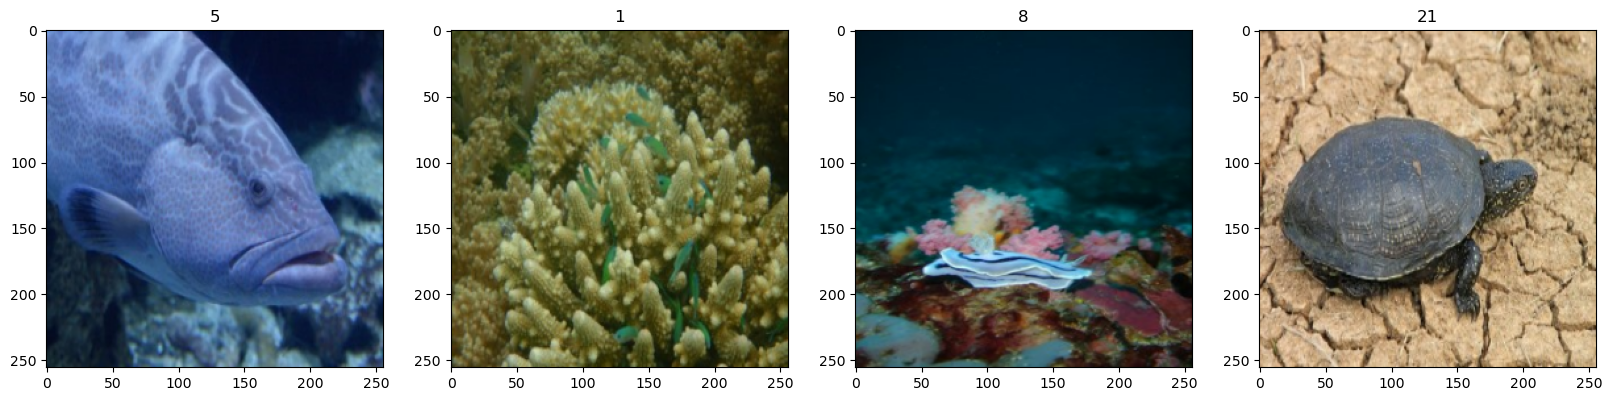

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y)) # normalizing

In [15]:
data.as_numpy_iterator().next()

(array([[[[2.96384811e-01, 2.00245097e-01, 1.05453432e-01],
          [4.68627453e-01, 3.39859068e-01, 2.31832102e-01],
          [5.36948502e-01, 3.62683833e-01, 2.40563720e-01],
          ...,
          [3.75337005e-01, 8.90624970e-02, 2.23958325e-02],
          [3.74571085e-01, 7.95649514e-02, 2.45404411e-02],
          [4.04810041e-01, 1.06770836e-01, 5.57904430e-02]],
 
         [[3.19583416e-01, 2.18626976e-01, 1.20974071e-01],
          [4.86700565e-01, 3.58611465e-01, 2.44635612e-01],
          [4.37690526e-01, 2.64928490e-01, 1.36036113e-01],
          ...,
          [4.28094834e-01, 1.33545399e-01, 6.61171079e-02],
          [4.07464951e-01, 1.01919614e-01, 5.14854267e-02],
          [4.36654121e-01, 1.28075689e-01, 8.23649094e-02]],
 
         [[3.74157012e-01, 2.69071221e-01, 1.63065836e-01],
          [5.09950876e-01, 3.81332815e-01, 2.58662671e-01],
          [4.51881319e-01, 2.81630099e-01, 1.40795425e-01],
          ...,
          [4.62758988e-01, 1.55033603e-01, 9.0787

# Split Data

In [16]:
train_size = int(len(data)*.7) %70
val_size = int(len(data)*.2)   %20
test_size = int(len(data)*.1)  %10

In [17]:
train_size, test_size

(20, 2)

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Modelling & Testing

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
20/20 [==============================] - 16s 719ms/step - loss: -13473.2910 - accuracy: 0.0437 - val_loss: -81547.8984 - val_accuracy: 0.0250
Epoch 2/20
20/20 [==============================] - 16s 820ms/step - loss: -790828.6875 - accuracy: 0.0422 - val_loss: -2793595.5000 - val_accuracy: 0.0375
Epoch 3/20
20/20 [==============================] - 17s 835ms/step - loss: -12638073.0000 - accuracy: 0.0375 - val_loss: -34246096.0000 - val_accuracy: 0.0437
Epoch 4/20
20/20 [==============================] - 17s 818ms/step - loss: -99020576.0000 - accuracy: 0.0531 - val_loss: -222083168.0000 - val_accuracy: 0.0500
Epoch 5/20
20/20 [==============================] - 17s 819ms/step - loss: -505700672.0000 - accuracy: 0.0500 - val_loss: -1086433024.0000 - val_accuracy: 0.0437
Epoch 6/20
20/20 [==============================] - 17s 811ms/step - loss: -1899624832.0000 - accuracy: 0.0484 - val_loss: -3569148416.0000 - val_accuracy: 0.0312
Epoch 7/20
20/20 [=============================

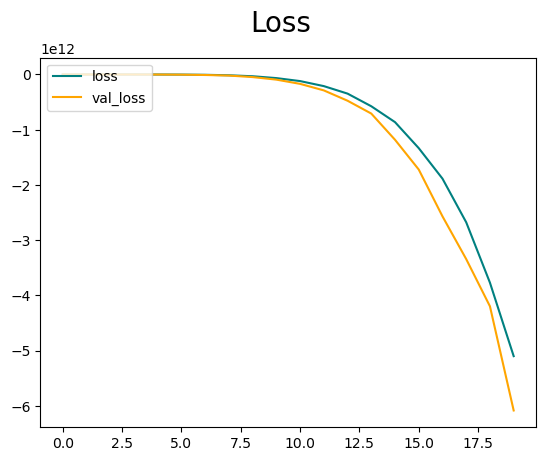

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

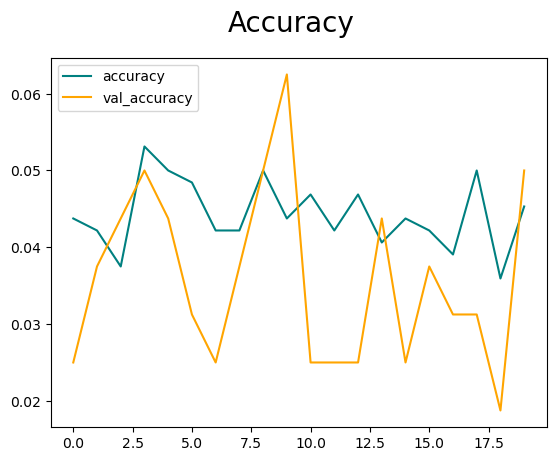

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()